In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('weatherHistory.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
Formatted Date              96453 non-null object
Summary                     96453 non-null object
Precip Type                 95936 non-null object
Temperature (C)             96453 non-null float64
Apparent Temperature (C)    96453 non-null float64
Humidity                    96453 non-null float64
Wind Speed (km/h)           96453 non-null float64
Wind Bearing (degrees)      96453 non-null float64
Visibility (km)             96453 non-null float64
Loud Cover                  96453 non-null float64
Pressure (millibars)        96453 non-null float64
Daily Summary               96453 non-null object
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [45]:
df.head()

Formatted Date        Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222   
1  2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain         9.355556   
2  2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain         9.377778   
3  2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain         8.288889   
4  2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain         8.755556   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   
3                  5.944444      0.83            14.1036   
4                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                   251.0          15.8263         0.0               1015.13   
1                   259.0          15.8263         0.0               1015.63   
2                   204.0          14.9569         0.0               1015.94   
3                   269.0          15.8263         0.0               1016.41   
4                   259.0          15.8263         0.0               1016.51   

                       Daily Summary  
0  Partly cloudy throughout the day.  
1  Partly cloudy throughout the day.  
2  Partly cloudy throughout the day.  
3  Partly cloudy throughout the day.  
4  Partly cloudy throughout the day.

In [46]:
df['Daily Summary'].nunique()
df['Daily Summary'].unique()

array(['Partly cloudy throughout the day.',
       'Mostly cloudy throughout the day.', 'Foggy in the evening.',
       'Foggy overnight and breezy in the morning.',
       'Overcast throughout the day.', 'Partly cloudy until night.',
       'Mostly cloudy until night.',
       'Foggy starting overnight continuing until morning.',
       'Foggy in the morning.', 'Partly cloudy until evening.',
       'Partly cloudy starting in the morning.',
       'Mostly cloudy starting overnight continuing until night.',
       'Mostly cloudy until evening.',
       'Partly cloudy starting in the morning continuing until evening.',
       'Partly cloudy starting in the afternoon.',
       'Partly cloudy starting overnight.',
       'Partly cloudy until morning.',
       'Partly cloudy starting overnight continuing until night.',
       'Partly cloudy starting in the afternoon continuing until night.',
       'Mostly cloudy starting overnight.',
       'Partly cloudy until afternoon.',
       'Mostly

In [47]:
df['Summary'].nunique()
df['Summary'].unique

<bound method Series.unique of 0        Partly Cloudy
1        Partly Cloudy
2        Mostly Cloudy
3        Partly Cloudy
4        Mostly Cloudy
5        Partly Cloudy
6        Partly Cloudy
7        Partly Cloudy
8        Partly Cloudy
9        Partly Cloudy
10       Partly Cloudy
11       Partly Cloudy
12       Partly Cloudy
13       Partly Cloudy
14       Partly Cloudy
15       Partly Cloudy
16       Partly Cloudy
17       Mostly Cloudy
18       Mostly Cloudy
19       Mostly Cloudy
20       Mostly Cloudy
21       Mostly Cloudy
22       Partly Cloudy
23       Mostly Cloudy
24       Partly Cloudy
25       Partly Cloudy
26       Mostly Cloudy
27       Partly Cloudy
28       Partly Cloudy
29       Partly Cloudy
             ...      
96423    Partly Cloudy
96424    Partly Cloudy
96425    Partly Cloudy
96426    Mostly Cloudy
96427    Partly Cloudy
96428    Partly Cloudy
96429    Partly Cloudy
96430            Clear
96431            Clear
96432            Clear
96433            Clear
964

In [48]:
df.describe()

Temperature (C)  Apparent Temperature (C)      Humidity  \
count     96453.000000              96453.000000  96453.000000   
mean         11.932678                 10.855029      0.734899   
std           9.551546                 10.696847      0.195473   
min         -21.822222                -27.716667      0.000000   
25%           4.688889                  2.311111      0.600000   
50%          12.000000                 12.000000      0.780000   
75%          18.838889                 18.838889      0.890000   
max          39.905556                 39.344444      1.000000   

       Wind Speed (km/h)  Wind Bearing (degrees)  Visibility (km)  Loud Cover  \
count       96453.000000            96453.000000     96453.000000     96453.0   
mean           10.810640              187.509232        10.347325         0.0   
std             6.913571              107.383428         4.192123         0.0   
min             0.000000                0.000000         0.000000         0.0   
25%             5.828200              116.000000         8.339800         0.0   
50%             9.965900              180.000000        10.046400         0.0   
75%            14.135800              290.000000        14.812000         0.0   
max            63.852600              359.000000        16.100000         0.0   

       Pressure (millibars)  
count          96453.000000  
mean            1003.235956  
std              116.969906  
min                0.000000  
25%             1011.900000  
50%             1016.450000  
75%             1021.090000  
max             1046.380000

In [49]:
temp_max=df.describe().iloc[7,0]
#minimum = df.describe().iloc[3,]
temp_max
temp_min = df.describe().iloc[3,0]
r_temp = temp_max/temp_min
r_temp
#similarly we can take ratios of other cols in which we are interested

-1.8286659877800402

# predict the apparent temperature given the humidity,wind speed,wind bearing,visibility and pressure

In [50]:
cor=df.corr()

In [51]:
df.drop(['Loud Cover'],axis =1,inplace = True)

In [52]:
#df

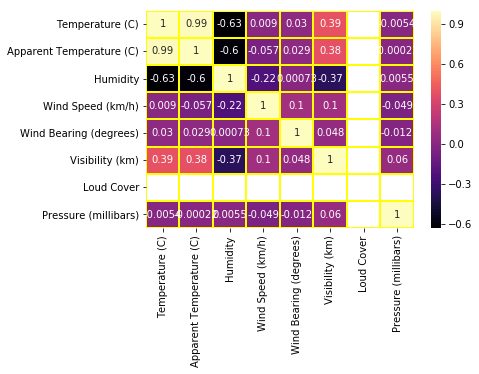

In [53]:
sns.heatmap(cor,cmap = 'magma',annot = True,linewidths = 1,linecolor = 'yellow')

In [54]:
cor = df['Temperature (C)'].corr(df['Apparent Temperature (C)'])
cor

0.9926285641921319

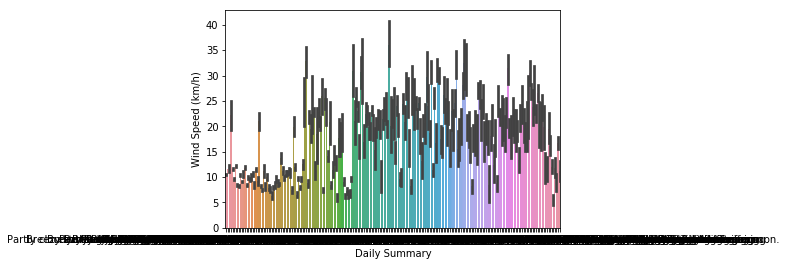

In [13]:
sns.barplot(x='Daily Summary',y='Wind Speed (km/h)',data =df)

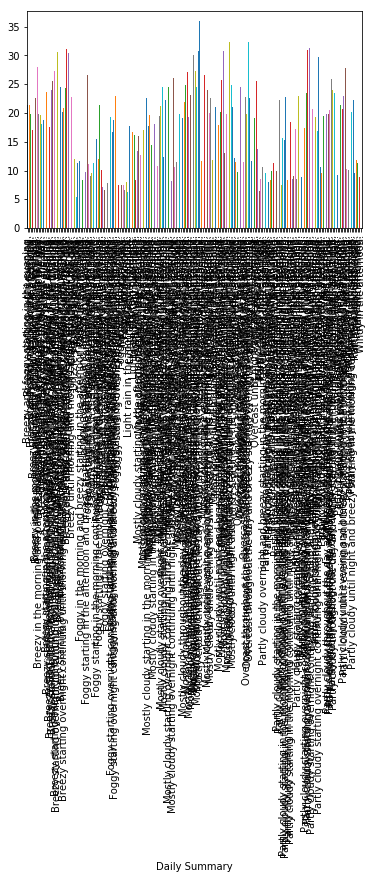

In [14]:
df.groupby('Daily Summary').mean()['Wind Speed (km/h)'].plot(kind = 'bar')

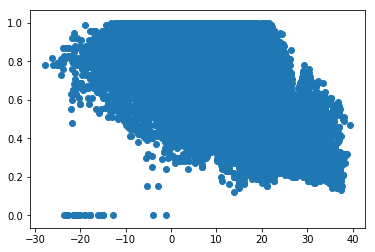

In [55]:
X = df['Apparent Temperature (C)'].values
Y = df['Humidity'].values
plt.scatter(X,Y)

In [16]:
plt.Line2D(X,Y)

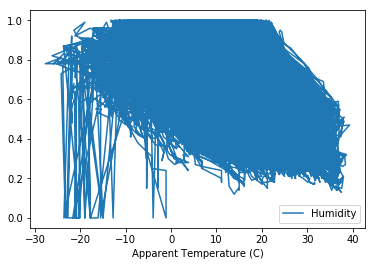

In [17]:
df.plot(x = 'Apparent Temperature (C)',y ='Humidity', kind = 'line')

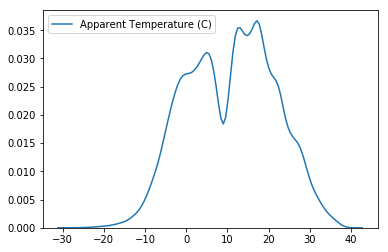

In [18]:
sns.kdeplot(df['Apparent Temperature (C)'])

In [19]:
df['Summary']=np.where(df['Summary'] =='Partly Cloudy', 'Cloudy Day', df['Summary'])
df['Summary']=np.where(df['Summary'] =='Mostly Cloudy', 'Cloudy Day', df['Summary'])
df['Summary']


0        Cloudy Day
1        Cloudy Day
2        Cloudy Day
3        Cloudy Day
4        Cloudy Day
5        Cloudy Day
6        Cloudy Day
7        Cloudy Day
8        Cloudy Day
9        Cloudy Day
10       Cloudy Day
11       Cloudy Day
12       Cloudy Day
13       Cloudy Day
14       Cloudy Day
15       Cloudy Day
16       Cloudy Day
17       Cloudy Day
18       Cloudy Day
19       Cloudy Day
20       Cloudy Day
21       Cloudy Day
22       Cloudy Day
23       Cloudy Day
24       Cloudy Day
25       Cloudy Day
26       Cloudy Day
27       Cloudy Day
28       Cloudy Day
29       Cloudy Day
            ...    
96423    Cloudy Day
96424    Cloudy Day
96425    Cloudy Day
96426    Cloudy Day
96427    Cloudy Day
96428    Cloudy Day
96429    Cloudy Day
96430         Clear
96431         Clear
96432         Clear
96433         Clear
96434         Clear
96435         Clear
96436         Clear
96437    Cloudy Day
96438    Cloudy Day
96439    Cloudy Day
96440    Cloudy Day
96441    Cloudy Day


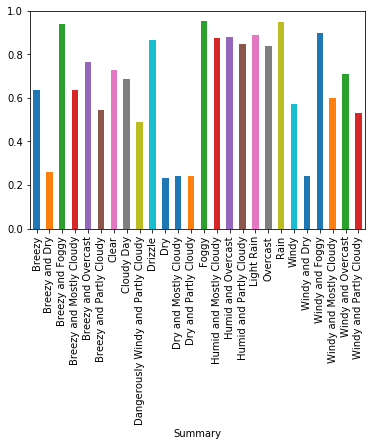

In [20]:
df.groupby('Summary').mean()['Humidity'].plot(kind = 'bar')

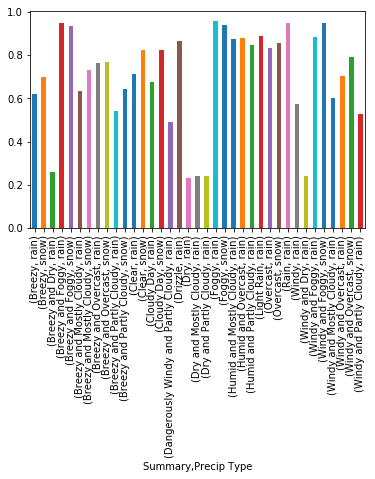

In [ ]:
d=df.groupby(['Summary','Precip Type'])['Humidity'].mean()
d.plot(kind='bar')


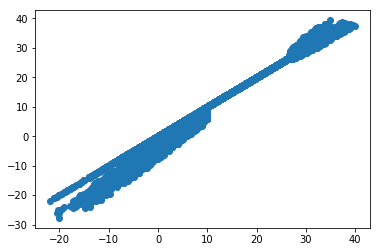

In [3]:
plt.scatter(x = df['Temperature (C)'],y =df['Apparent Temperature (C)'],data = df)

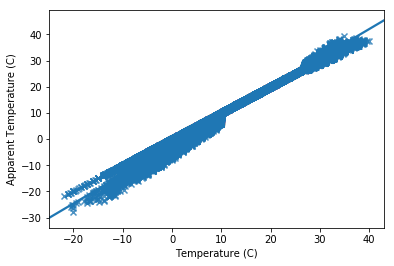

In [17]:
sns.regplot(x=df['Temperature (C)'], y=df['Apparent Temperature (C)'], data=df, marker ='x',x_jitter=3,y_jitter=3);

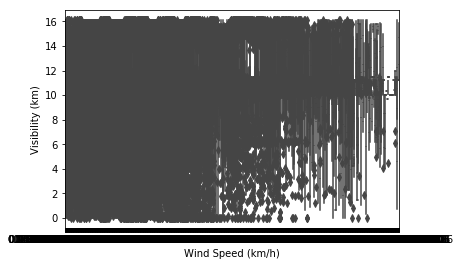

In [38]:
sns.boxplot(x = 'Wind Speed (km/h)',y = 'Visibility (km)',data = df)


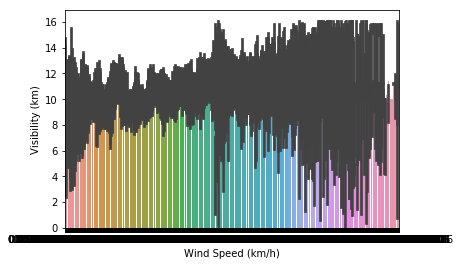

In [39]:
sns.barplot(x = 'Wind Speed (km/h)',y = 'Visibility (km)',data = df)


# model

In [69]:

x0 = df['Temperature (C)'].values.reshape(len(x0),1)
y = df['Apparent Temperature (C)'].values.reshape(len(y),1)
x1 = df['Humidity'].values.reshape(len(x1),1)
x2 = df['Wind Speed (km/h)'].values.reshape(len(x2),1)
x3 = df['Wind Bearing (degrees)'].values.reshape(len(x3),1)
x4 = df['Visibility (km)'].values.reshape(len(x4),1)



In [70]:
sample=10000
feature = 5
step = 0.0001

In [72]:
xone=np.ones(len(x0)).reshape(len(xone),1)
xone.shape

(96453, 1)

In [73]:
x = np.concatenate((xone,x0,x1,x2,x3,x4),axis = 1)
#x=x.reshape(len(x),feature)
x.shape

(96453, 6)

# random beta generation(initial stage)

In [74]:
coeff = np.random.rand(feature+1,1)
coeff

array([[0.14808537],
       [0.73936095],
       [0.83368551],
       [0.29438377],
       [0.60729304],
       [0.30849707]])

In [75]:
y_pred = x.dot(coeff) 
y_pred.shape

(96453, 1)

In [76]:
cost = np.sum(np.square(y-y_pred))/(len(x))
cost

18451.09014068015

In [77]:
derivative = -2 *np.dot(x.T,(y - y_pred))
derivative

array([[2.29511718e+07],
       [2.71700143e+08],
       [1.69141608e+07],
       [2.60878129e+08],
       [5.65803703e+09],
       [2.40097709e+08]])

In [78]:
for i in range(10):
    coeff = coeff - step * derivative
    y_pred = np.dot(x,coeff)
    derivative = -2 *np.dot(x.T,(y - y_pred))
    cost2 = np.sum(np.square(y-y_pred))/(len(x))
    if cost2 - cost < 0.001:
        break
cost2    

2.5742632223523418e+123

# optimize beta

In [89]:
import math

coeffs = np.random.rand(x.shape[1]).reshape(x.shape[1],1)
print(coeffs)

step_size = 0.00001
rmse = -1
for epoch in range(10):
    old_rmse = rmse
    y_pred = x.dot(coeffs)
    error = y.reshape(len(x),1)-y_pred
    rmse = math.sqrt(error.T.dot(error)/x.shape[0])
    print(epoch,":",rmse)
    if abs(rmse-old_rmse) < 0.000000000001:
        break
    
    derivative = 2*error.T.dot(x)/x.shape[0]
    coeffs = coeffs+step_size*derivative.T
print(coeffs)

[[0.81035072]
 [0.70459481]
 [0.55263771]
 [0.87377387]
 [0.76679756]
 [0.08159645]]
0 : 174.03898333272522
1 : 13.520371458310013
2 : 8.533283187950383
3 : 8.499736052993901
4 : 8.489617388575413
5 : 8.479597535737467
6 : 8.469591161085201
7 : 8.459597932864368
8 : 8.449617829776331
9 : 8.43965083170462
[[ 0.80679255]
 [ 0.66971493]
 [ 0.5499789 ]
 [ 0.82559172]
 [-0.03224576]
 [ 0.04523247]]


# sklearn

In [80]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

regr = linear_model.LinearRegression()

input_data = x     #[1:,:]

# Train the model using the training sets
regr.fit(input_data, y)

# Make predictions using the testing set
y_pred = regr.predict(input_data)

# The coefficients
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y, y_pred))

Coefficients: 
 [[ 0.00000000e+00  1.12550744e+00  1.03167680e+00 -9.58474187e-02
   5.29637085e-04 -3.68577011e-04]]
Intercept: 
 [-2.39279383]
Mean squared error: 1.16
Variance score: 0.99
